In [205]:
import matplotlib.pyplot as plt
import numpy as np


In [206]:
download_times = []
optimal_download_times = []
# data format '1792 download time: 59  ms'
for i in range(1, 11):
    with open(f"logs/normal_{i}.log", "r") as f:
        for line in f:
            if "download time" in line and not line.startswith('4'):
                download_times.append(int(line.split()[3]))
for i in range(1, 11):
    with open(f"logs/prof_{i}.log", "r") as f:
        for line in f:
            if "download time" in line and not line.startswith('4'):
                optimal_download_times.append(int(line.split()[3]))


In [207]:
# 打乱数据, 去除网络波动造成异常数据堆积
np.random.shuffle(download_times)
np.random.shuffle(optimal_download_times)

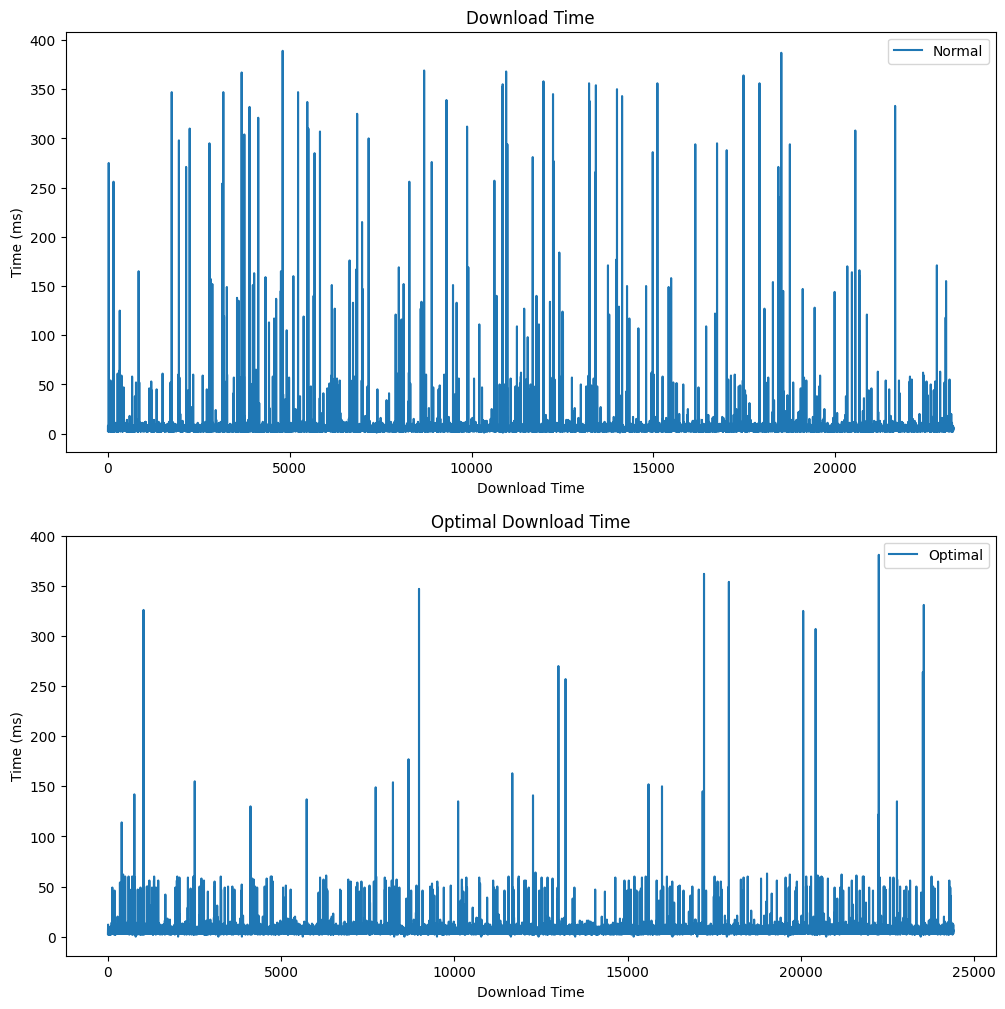

In [208]:


# 绘制滑动平均的折线图
fig, axs = plt.subplots(2,1, figsize=(12,12))

axs[0].plot(download_times, label='Normal')
axs[0].set_title('Download Time')
axs[0].set_xlabel('Download Time')
axs[0].set_ylabel('Time (ms)')
axs[0].legend()

axs[1].plot(optimal_download_times, label='Optimal')
axs[1].set_title('Optimal Download Time')
axs[1].set_xlabel('Download Time')
axs[1].set_ylabel('Time (ms)')
axs[1].legend()


plt.savefig('download_time.png', dpi=300)

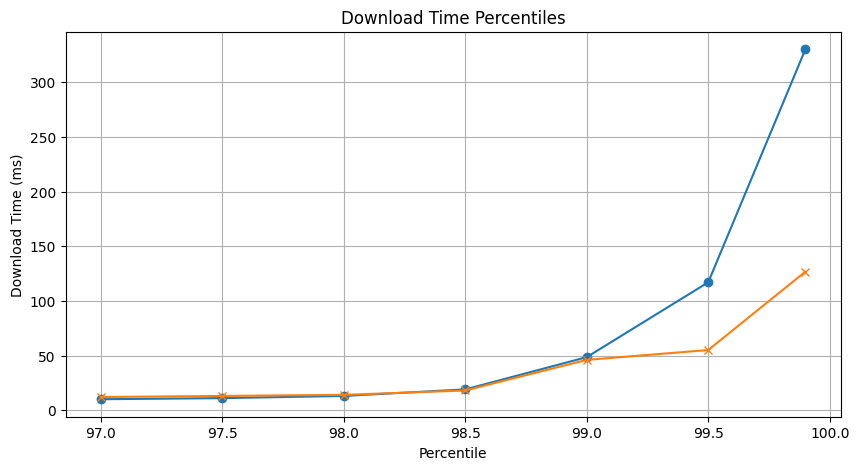

In [209]:

# 绘制延迟时间百分位数图
percentiles = [97,97.5,98,98.5,99,99.5,99.9]  # 你可以根据需要修改这个列表

percentile_values = np.percentile(download_times, percentiles)
optimal_percentile_values = np.percentile(optimal_download_times, percentiles)


plt.figure(figsize=(10, 5))
plt.plot(percentiles, percentile_values, marker='o', label='Normal')
plt.plot(percentiles, optimal_percentile_values, marker='x', label='Optimal')
plt.title('Download Time Percentiles')
plt.xlabel('Percentile')
plt.ylabel('Download Time (ms)')
plt.grid(True)
plt.savefig('download_time_percentiles.png', dpi=300)



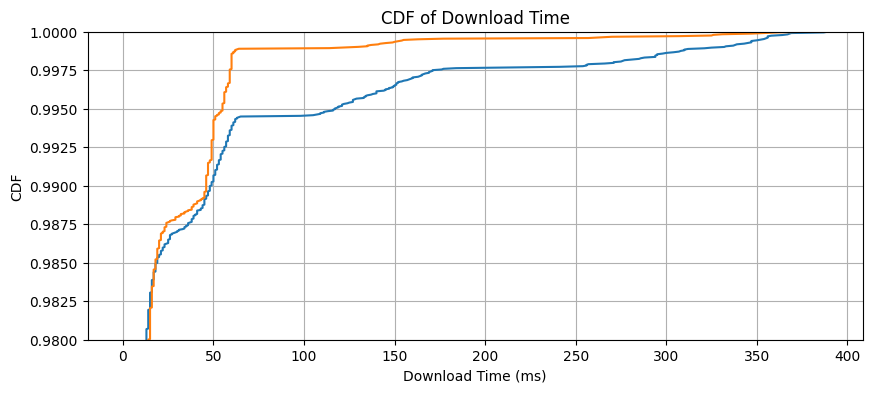

In [210]:

# 计算CDF
download_times_sorted = np.sort(download_times)
optimal_download_times_sorted = np.sort(optimal_download_times)
# 从0.9到1.0之间的值
p = 1. * np.arange(len(download_times)) / (len(download_times) - 1)

p2 = 1. * np.arange(len(optimal_download_times)) / (len(optimal_download_times) - 1)

# 绘制CDF图
plt.figure(figsize=(10, 4))
plt.plot(download_times_sorted, p, label='Normal')
plt.plot(optimal_download_times_sorted, p2, label='Optimal')
plt.title('CDF of Download Time')
plt.xlabel('Download Time (ms)')
plt.ylabel('CDF')
plt.grid(True)
plt.ylim(0.98,1.0)
plt.savefig('download_time_cdf.png', dpi=300)

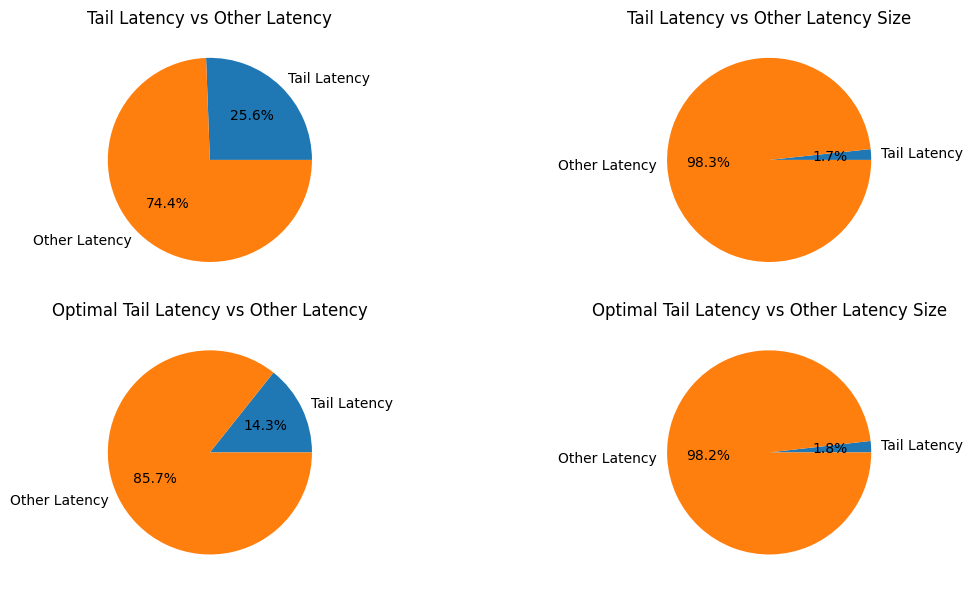

In [211]:
import matplotlib.pyplot as plt
import numpy as np

# 延迟大于99%的数据
tail_latency =  [x for x in download_times if x > 15]
tail_sum = np.sum(tail_latency)
tail_size = len(tail_latency)
other_latency = [x for x in download_times if x <= 15]
other_sum = np.sum(other_latency)
other_size = len(other_latency)

optimal_tail_latency =  [x for x in optimal_download_times if x > 15]
optimal_tail_sum = np.sum(optimal_tail_latency)
optimal_tail_size = len(optimal_tail_latency)
optimal_other_latency = [x for x in optimal_download_times if x <= 15]
optimal_other_sum = np.sum(optimal_other_latency)
optimal_other_size = len(optimal_other_latency)

# 创建2行2列的子图布局
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
# 优化前
# 在第一个位置绘制饼图，尾延迟占总延迟的百分比
axs[0, 0].pie([tail_sum, other_sum], labels=['Tail Latency', 'Other Latency'], autopct='%1.1f%%')
axs[0, 0].set_title('Tail Latency vs Other Latency')

# 在第二个位置绘制饼图，尾延迟占总延迟的百分比
axs[0, 1].pie([tail_size, other_size], labels=['Tail Latency', 'Other Latency'], autopct='%1.1f%%')
axs[0, 1].set_title('Tail Latency vs Other Latency Size')


# 在第三个位置绘制饼图, 尾延迟数目占比
axs[1, 0].pie([optimal_tail_sum, optimal_other_sum], labels=['Tail Latency', 'Other Latency'], autopct='%1.1f%%')
axs[1, 0].set_title('Optimal Tail Latency vs Other Latency')


# 在第四个位置绘制饼图, 尾延迟数目占比
axs[1, 1].pie([optimal_tail_size, optimal_other_size], labels=['Tail Latency', 'Other Latency'], autopct='%1.1f%%')
axs[1, 1].set_title('Optimal Tail Latency vs Other Latency Size')


plt.tight_layout()
plt.savefig('tail_latency.png', dpi=300)